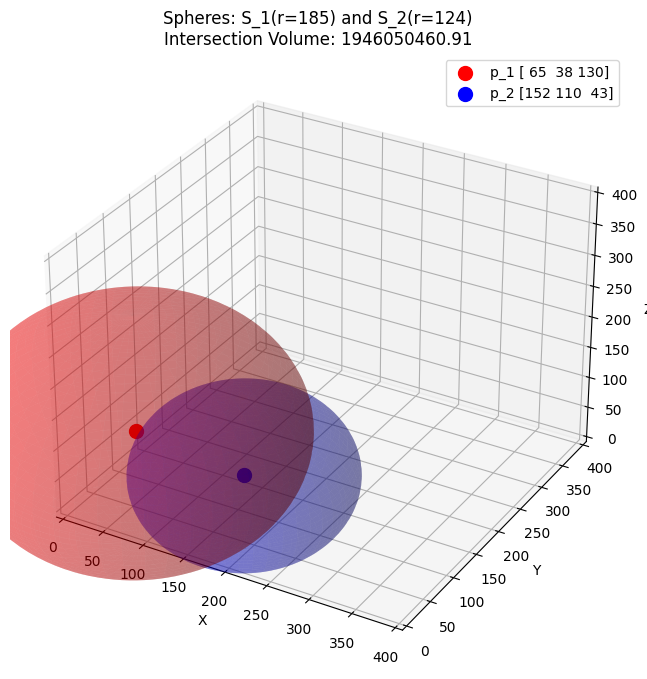

p_1: [ 65  38 130], r_1: 185
p_2: [152 110  43], r_2: 124
Distance between centers: 142.56
Intersection Volume: 1946050460.91


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate two random points in 3D space (400x400x400)
p_1 = np.random.randint(0, 401, 3)
p_2 = np.random.randint(0, 401, 3)

# Generate two random radii between 90 and 200
r_1 = np.random.randint(90, 201)
r_2 = np.random.randint(90, 201)

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Function to generate sphere surface points
def sphere_points(center, radius, n_points=100):
    u = np.linspace(0, 2 * np.pi, n_points)
    v = np.linspace(0, np.pi, n_points)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    return x, y, z

# Generate and plot sphere S_1
x1, y1, z1 = sphere_points(p_1, r_1)
ax.plot_surface(x1, y1, z1, color='r', alpha=0.3)

# Generate and plot sphere S_2
x2, y2, z2 = sphere_points(p_2, r_2)
ax.plot_surface(x2, y2, z2, color='b', alpha=0.3)

# Plot center points
ax.scatter(*p_1, color='r', s=100, label=f'p_1 {p_1}')
ax.scatter(*p_2, color='b', s=100, label=f'p_2 {p_2}')

# Set axis limits
ax.set_xlim(0, 400)
ax.set_ylim(0, 400)
ax.set_zlim(0, 400)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Calculate the intersection volume
def sphere_intersection_volume(c1, r1, c2, r2):
    d = np.linalg.norm(np.array(c1) - np.array(c2))
    if d >= r1 + r2:
        return 0  # No intersection
    if d <= abs(r1 - r2):
        return 4/3 * np.pi * min(r1, r2)**3  # One sphere is inside the other

    a = (r1**2 - r2**2 + d**2) / (2*d)
    h1 = r1 - a
    h2 = r2 - (d - a)

    volume = (np.pi/12) * (d + r1 + r2 - abs(d - r1 + r2)) * (d - r1 + r2 + abs(d - r1 + r2)) * \
             (d + r1 - r2 + abs(d - r1 - r2)) * (-d + r1 + r2 + abs(d - r1 - r2))
    return volume

intersection_volume = sphere_intersection_volume(p_1, r_1, p_2, r_2)

# Add legend and title
ax.legend()
plt.title(f"Spheres: S_1(r={r_1}) and S_2(r={r_2})\nIntersection Volume: {intersection_volume:.2f}")

# Show the plot
plt.show()

print(f"p_1: {p_1}, r_1: {r_1}")
print(f"p_2: {p_2}, r_2: {r_2}")
print(f"Distance between centers: {np.linalg.norm(np.array(p_1) - np.array(p_2)):.2f}")
print(f"Intersection Volume: {intersection_volume:.2f}")

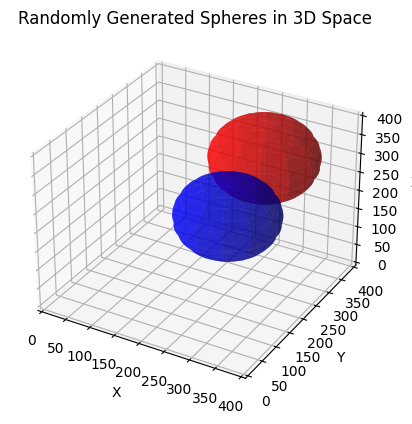

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to generate a random point in 3D space within the bounds [0, 400]
def random_point():
    return np.random.uniform(0, 400, 3)

# Function to generate random radius in the interval [10, 50]
def random_radius():
    return np.random.uniform(90, 200)

# Function to create a meshgrid for a sphere
def create_sphere(center, radius, num_points=50):
    u = np.linspace(0, 2 * np.pi, num_points)
    v = np.linspace(0, np.pi, num_points)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    return x, y, z

# Randomly generate points p_1 and p_2
p_1 = random_point()
p_2 = random_point()

# Randomly generate radii r_1 and r_2
r_1 = random_radius()
r_2 = random_radius()

# Create sphere meshes
x1, y1, z1 = create_sphere(p_1, r_1)
x2, y2, z2 = create_sphere(p_2, r_2)

# Plot the spheres
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Sphere 1
ax.plot_surface(x1, y1, z1, color='r', alpha=0.6, rstride=4, cstride=4)

# Sphere 2
ax.plot_surface(x2, y2, z2, color='b', alpha=0.6, rstride=4, cstride=4)

# Set plot limits
ax.set_xlim([0, 400])
ax.set_ylim([0, 400])
ax.set_zlim([0, 400])

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set title
ax.set_title('Randomly Generated Spheres in 3D Space')

plt.show()